In [3]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

set index_col = 0 to consider first as the index

In [12]:
data = pd.read_csv('../Data/KNN.txt', index_col= 0)

In [13]:
data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


### standardize the variables

Since KNN predicts the class of a ginve test observation by identifying the data ppints which are nearer. hence the scale of the variables matters. any variables that are on larger scale will have larger distance between these observations hence the KNN clasifier than the variables on the smaller scale.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data.drop('TARGET CLASS', axis= 1))

StandardScaler()

In [30]:
scaled_features = scaler.transform(data.drop('TARGET CLASS', axis= 1))

In [32]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [33]:
df_feat = pd.DataFrame(scaled_features, columns= data.columns[:-1])

In [17]:
df_feature

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167
...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063


In [34]:
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
sv_train, sv_test, tv_train, tv_test = train_test_split(df_feat, data['TARGET CLASS'], test_size=0.25, random_state=12)

### KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors =1)

In [56]:
knn.fit(sv_train,tv_train)

KNeighborsClassifier(n_neighbors=1)

### Prediction and Evaluation

In [53]:
pred = knn.predict(sv_test)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
print(confusion_matrix(tv_test,pred))

[[117  15]
 [  3 115]]


In [59]:
    print(classification_report(tv_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       132
           1       0.88      0.97      0.93       118

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [61]:
error_rate = []


for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(sv_train,tv_train)
    pred_i = knn.predict(sv_test)
    error_rate.append(np.mean(pred_i != tv_test))

Text(0, 0.5, 'Error Rate')

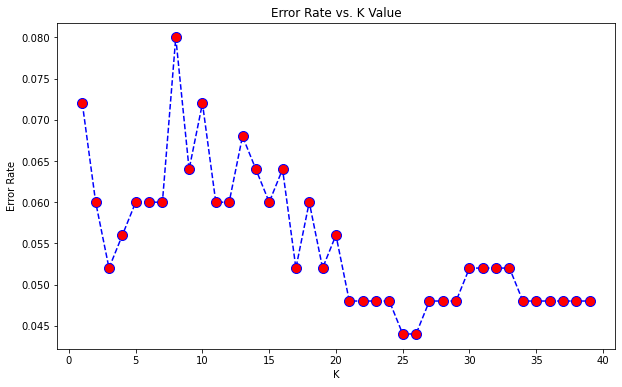

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [75]:
# NOW WITH K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(sv_train,tv_train)
pred = knn.predict(sv_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(tv_test,pred))
print('\n')
print(classification_report(tv_test,pred))

WITH K=1


[[117  15]
 [  3 115]]


              precision    recall  f1-score   support

           0       0.97      0.89      0.93       132
           1       0.88      0.97      0.93       118

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [74]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(sv_train,tv_train)
pred = knn.predict(sv_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(tv_test,pred))
print('\n')
print(classification_report(tv_test,pred))

WITH K=25


[[123   9]
 [  2 116]]


              precision    recall  f1-score   support

           0       0.98      0.93      0.96       132
           1       0.93      0.98      0.95       118

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

